In [1]:
import os
import time

import dill
import matplotlib.pyplot as plt
import pyro
import seaborn as sns
import torch

import pandas as pd
import pyro.distributions as dist
from chirho.dynamical.handlers import LogTrajectory
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import simulate
from pyro.infer import Predictive
from chirho.observational.handlers import condition
from chirho.dynamical.handlers import LogTrajectory, StaticBatchObservation
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import Dynamics, State, simulate

pyro.settings.set(module_local_params=True)

sns.set_style("white")

# Set seed for reproducibility
seed = 123
pyro.clear_param_store()
pyro.set_rng_seed(seed)

import matplotlib.pyplot as plt
import seaborn as sns
import torch

from collab.foraging import locust as lc
from collab.foraging import toolkit as ft
from collab.utils import find_repo_root, progress_saver


smoke_test = "CI" in os.environ
num_iterations = 50 if smoke_test else 100
num_samples = 20 if smoke_test else 100

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 20
0 30
0 40
0 50
20 21
20 22
20 23
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 40
No samples file found, running inference


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


Running SVI for 1500 steps...
[iteration 0001] loss: 175.6557


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


[iteration 0050] loss: 172.0233
[iteration 0100] loss: 182.0125
[iteration 0150] loss: 178.4700
[iteration 0200] loss: 189.7552
[iteration 0250] loss: 169.7313
[iteration 0300] loss: 179.0322
[iteration 0350] loss: 173.1447
[iteration 0400] loss: 172.7747
[iteration 0450] loss: 170.6738
[iteration 0500] loss: 155.2222
[iteration 0550] loss: 169.9438
[iteration 0600] loss: 160.2284
[iteration 0650] loss: 166.3819
[iteration 0700] loss: 167.4887
[iteration 0750] loss: 154.8337
[iteration 0800] loss: 154.8932
[iteration 0850] loss: 163.7664
[iteration 0900] loss: 159.3471
[iteration 0950] loss: 169.1516
[iteration 1000] loss: 164.7190
[iteration 1050] loss: 149.1423
[iteration 1100] loss: 163.9522
[iteration 1150] loss: 141.3113
[iteration 1200] loss: 161.7552
[iteration 1250] loss: 164.6256
[iteration 1300] loss: 167.6117
[iteration 1350] loss: 148.7190
[iteration 1400] loss: 156.3817
[iteration 1450] loss: 154.3929
[iteration 1500] loss: 142.7100


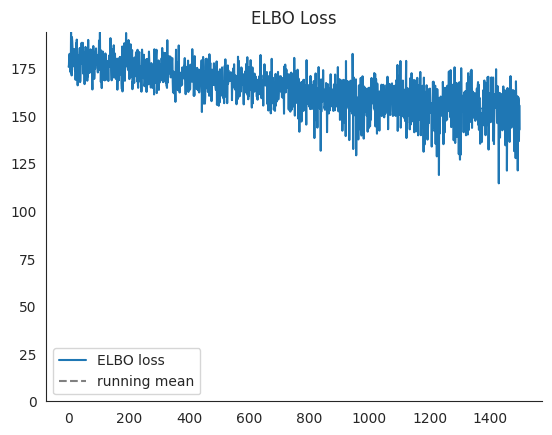

20 50
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 246.2943
[iteration 0050] loss: 239.0942
[iteration 0100] loss: 249.2209
[iteration 0150] loss: 238.9958
[iteration 0200] loss: 244.9230
[iteration 0250] loss: 242.5729
[iteration 0300] loss: 245.9392
[iteration 0350] loss: 237.6259
[iteration 0400] loss: 243.3507
[iteration 0450] loss: 234.8732
[iteration 0500] loss: 241.6725
[iteration 0550] loss: 241.7112
[iteration 0600] loss: 240.5971
[iteration 0650] loss: 237.9025
[iteration 0700] loss: 249.9929
[iteration 0750] loss: 234.9243
[iteration 0800] loss: 254.4318
[iteration 0850] loss: 240.6917
[iteration 0900] loss: 241.3908
[iteration 0950] loss: 244.0343
[iteration 1000] loss: 233.7238
[iteration 1050] loss: 240.3019
[iteration 1100] loss: 217.6949
[iteration 1150] loss: 238.4386
[iteration 1200] loss: 225.9920
[iteration 1250] loss: 237.3503
[iteration 1300] loss: 205.5836
[iteration 1350] loss: 228.3968
[iteration 1400] loss: 213.

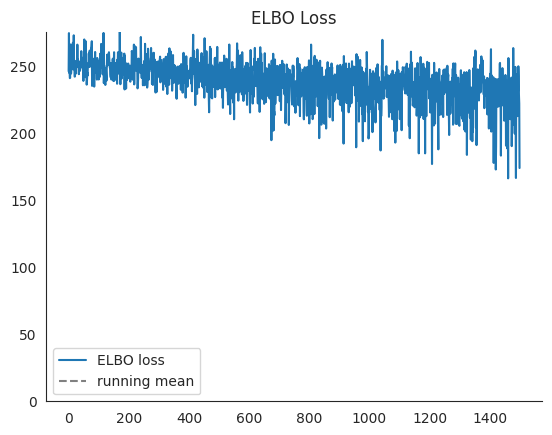

20 60
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 332.6306
[iteration 0050] loss: 338.0740
[iteration 0100] loss: 339.0807
[iteration 0150] loss: 343.2719
[iteration 0200] loss: 330.3868
[iteration 0250] loss: 338.9624
[iteration 0300] loss: 329.9307
[iteration 0350] loss: 325.2736
[iteration 0400] loss: 313.3977
[iteration 0450] loss: 326.3420
[iteration 0500] loss: 330.8122
[iteration 0550] loss: 312.7401
[iteration 0600] loss: 331.1772
[iteration 0650] loss: 332.8686
[iteration 0700] loss: 325.1703
[iteration 0750] loss: 338.4433
[iteration 0800] loss: 298.7199
[iteration 0850] loss: 299.5484
[iteration 0900] loss: 309.1922
[iteration 0950] loss: 316.5969
[iteration 1000] loss: 320.9737
[iteration 1050] loss: 331.4460
[iteration 1100] loss: 308.0631
[iteration 1150] loss: 330.9437
[iteration 1200] loss: 326.2549
[iteration 1250] loss: 247.4819
[iteration 1300] loss: 299.2219
[iteration 1350] loss: 319.6244
[iteration 1400] loss: 323.

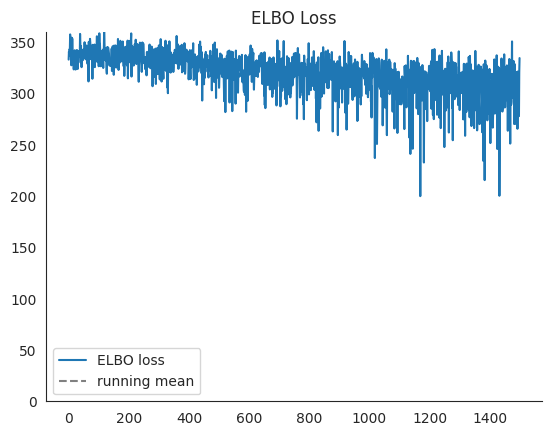

20 70
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 412.5506
[iteration 0050] loss: 420.9346
[iteration 0100] loss: 405.6519
[iteration 0150] loss: 410.7483
[iteration 0200] loss: 402.0492
[iteration 0250] loss: 417.1983
[iteration 0300] loss: 412.1505
[iteration 0350] loss: 411.7910
[iteration 0400] loss: 428.3959
[iteration 0450] loss: 421.1440
[iteration 0500] loss: 403.4765
[iteration 0550] loss: 414.3232
[iteration 0600] loss: 401.5319
[iteration 0650] loss: 411.9765
[iteration 0700] loss: 405.2568
[iteration 0750] loss: 422.1528
[iteration 0800] loss: 396.9621
[iteration 0850] loss: 415.7480
[iteration 0900] loss: 382.7225
[iteration 0950] loss: 390.9904
[iteration 1000] loss: 400.8425
[iteration 1050] loss: 359.0818
[iteration 1100] loss: 394.6895
[iteration 1150] loss: 397.9783
[iteration 1200] loss: 398.5232
[iteration 1250] loss: 413.5098
[iteration 1300] loss: 392.5687
[iteration 1350] loss: 401.5604
[iteration 1400] loss: 369.

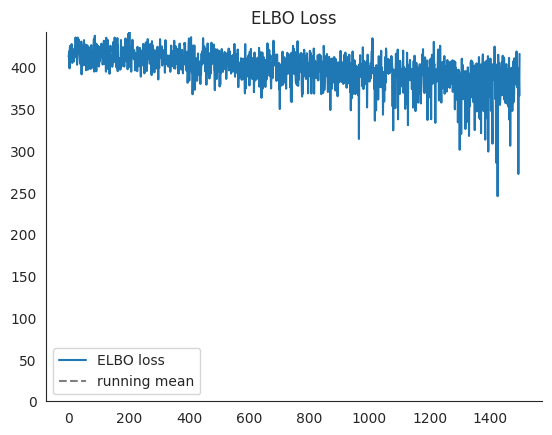

40 41
40 42
40 43
40 44
40 45
40 46
40 47
40 48
40 49
40 50
40 51
40 52
40 53
40 54
40 55
40 60
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 184.2254
[iteration 0050] loss: 184.8441
[iteration 0100] loss: 172.8008
[iteration 0150] loss: 184.1059
[iteration 0200] loss: 178.3764
[iteration 0250] loss: 166.7468
[iteration 0300] loss: 175.5652
[iteration 0350] loss: 162.4958
[iteration 0400] loss: 163.0258
[iteration 0450] loss: 162.8417
[iteration 0500] loss: 173.5635
[iteration 0550] loss: 158.5452
[iteration 0600] loss: 170.1662
[iteration 0650] loss: 171.5734
[iteration 0700] loss: 152.2104
[iteration 0750] loss: 161.3007
[iteration 0800] loss: 172.9077
[iteration 0850] loss: 163.7881
[iteration 0900] loss: 169.6545
[iteration 0950] loss: 160.2908
[iteration 1000] loss: 159.6256
[iteration 1050] loss: 170.4575
[iteration 1100] loss: 166.3049
[iteration 1150] loss: 155.1075
[iteration 1200] loss: 149.7559
[iteration 1250] loss: 138.4029
[

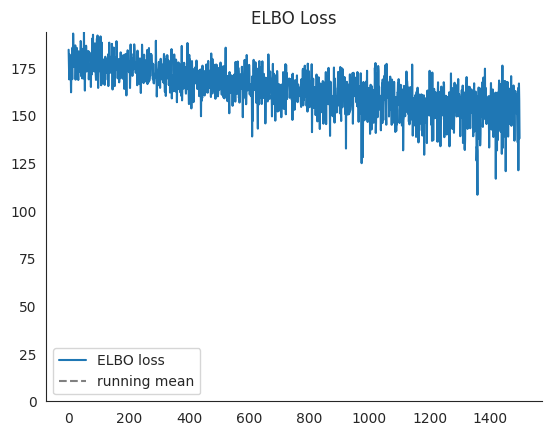

40 70
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 246.5219
[iteration 0050] loss: 266.6499
[iteration 0100] loss: 261.0448
[iteration 0150] loss: 254.6912
[iteration 0200] loss: 259.8646
[iteration 0250] loss: 242.4743
[iteration 0300] loss: 257.9249
[iteration 0350] loss: 254.3101
[iteration 0400] loss: 244.5157
[iteration 0450] loss: 247.3522
[iteration 0500] loss: 254.0318
[iteration 0550] loss: 242.0497
[iteration 0600] loss: 252.2881
[iteration 0650] loss: 249.7215
[iteration 0700] loss: 241.7589
[iteration 0750] loss: 246.2779
[iteration 0800] loss: 244.9776
[iteration 0850] loss: 232.9631
[iteration 0900] loss: 248.2960
[iteration 0950] loss: 229.8260
[iteration 1000] loss: 247.0629
[iteration 1050] loss: 249.3498
[iteration 1100] loss: 227.8019
[iteration 1150] loss: 228.0219
[iteration 1200] loss: 230.8506
[iteration 1250] loss: 236.6364
[iteration 1300] loss: 232.5832
[iteration 1350] loss: 261.5436
[iteration 1400] loss: 239.

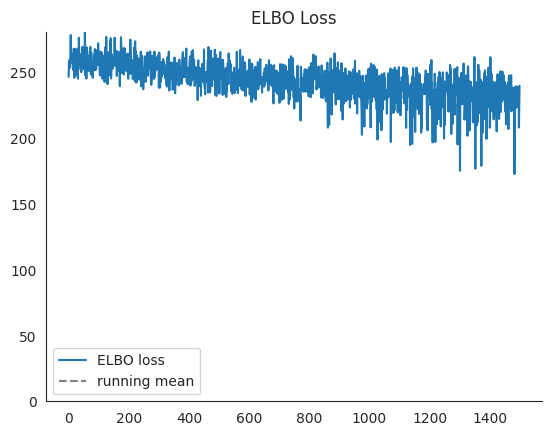

40 80
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 333.4932
[iteration 0050] loss: 330.8333
[iteration 0100] loss: 336.0248
[iteration 0150] loss: 324.3238
[iteration 0200] loss: 319.4345
[iteration 0250] loss: 319.5325
[iteration 0300] loss: 303.3632
[iteration 0350] loss: 323.5700
[iteration 0400] loss: 319.1007
[iteration 0450] loss: 290.1702
[iteration 0500] loss: 315.4354
[iteration 0550] loss: 320.7658
[iteration 0600] loss: 325.4844
[iteration 0650] loss: 303.3185
[iteration 0700] loss: 311.0198
[iteration 0750] loss: 249.7184
[iteration 0800] loss: 287.3475
[iteration 0850] loss: 332.0171
[iteration 0900] loss: 317.8845
[iteration 0950] loss: 335.9119
[iteration 1000] loss: 272.1875
[iteration 1050] loss: 321.1062
[iteration 1100] loss: 330.0157
[iteration 1150] loss: 285.0813
[iteration 1200] loss: 233.5996
[iteration 1250] loss: 312.7510
[iteration 1300] loss: 253.1709
[iteration 1350] loss: 247.1578
[iteration 1400] loss: 316.

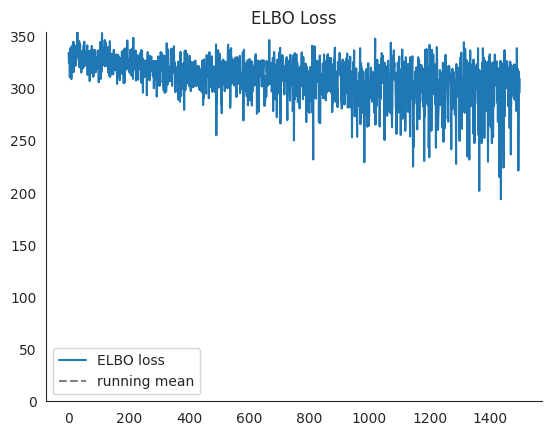

40 90
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 427.8906
[iteration 0050] loss: 432.5890
[iteration 0100] loss: 410.4060
[iteration 0150] loss: 408.8090
[iteration 0200] loss: 429.2473
[iteration 0250] loss: 420.3147
[iteration 0300] loss: 427.3521
[iteration 0350] loss: 402.9035
[iteration 0400] loss: 415.8757
[iteration 0450] loss: 409.1406
[iteration 0500] loss: 415.3322
[iteration 0550] loss: 407.5162
[iteration 0600] loss: 390.7545
[iteration 0650] loss: 407.3080
[iteration 0700] loss: 415.6190
[iteration 0750] loss: 410.4375
[iteration 0800] loss: 393.8090
[iteration 0850] loss: 397.6220
[iteration 0900] loss: 409.1848
[iteration 0950] loss: 410.3012
[iteration 1000] loss: 392.7255
[iteration 1050] loss: 381.4608
[iteration 1100] loss: 411.8332
[iteration 1150] loss: 413.1513
[iteration 1200] loss: 415.1681
[iteration 1250] loss: 351.4185
[iteration 1300] loss: 397.5079
[iteration 1350] loss: 378.4402
[iteration 1400] loss: 393.

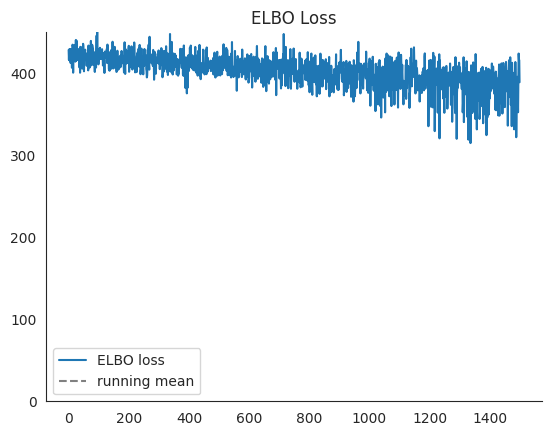

60 61
60 62
60 63
60 64
60 65
60 66
60 67
60 68
60 69
60 70
60 71
60 72
60 73
60 74
60 75
60 80
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 181.2995
[iteration 0050] loss: 180.4353
[iteration 0100] loss: 183.9573
[iteration 0150] loss: 187.3598
[iteration 0200] loss: 171.0402
[iteration 0250] loss: 178.4566
[iteration 0300] loss: 176.2747
[iteration 0350] loss: 179.8577
[iteration 0400] loss: 162.1877
[iteration 0450] loss: 167.3509
[iteration 0500] loss: 165.7105
[iteration 0550] loss: 169.0512
[iteration 0600] loss: 161.6150
[iteration 0650] loss: 179.0674
[iteration 0700] loss: 162.1206
[iteration 0750] loss: 174.3696
[iteration 0800] loss: 161.1620
[iteration 0850] loss: 147.7145
[iteration 0900] loss: 154.8727
[iteration 0950] loss: 167.8104
[iteration 1000] loss: 174.2816
[iteration 1050] loss: 160.3582
[iteration 1100] loss: 153.3220
[iteration 1150] loss: 170.3138
[iteration 1200] loss: 145.3827
[iteration 1250] loss: 164.8219
[

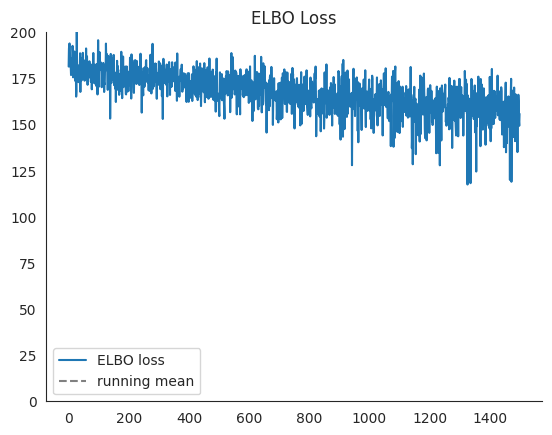

60 90
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 272.1863
[iteration 0050] loss: 266.6923
[iteration 0100] loss: 280.1017
[iteration 0150] loss: 249.1997
[iteration 0200] loss: 265.1130
[iteration 0250] loss: 273.0414
[iteration 0300] loss: 267.3621
[iteration 0350] loss: 255.1033
[iteration 0400] loss: 250.5931
[iteration 0450] loss: 242.0162
[iteration 0500] loss: 266.3672
[iteration 0550] loss: 258.8998
[iteration 0600] loss: 256.2066
[iteration 0650] loss: 263.7883
[iteration 0700] loss: 237.1709
[iteration 0750] loss: 249.8209
[iteration 0800] loss: 249.6600
[iteration 0850] loss: 251.4215
[iteration 0900] loss: 232.0653
[iteration 0950] loss: 259.4904
[iteration 1000] loss: 236.7846
[iteration 1050] loss: 242.6000
[iteration 1100] loss: 237.5670
[iteration 1150] loss: 249.1428
[iteration 1200] loss: 253.0707
[iteration 1250] loss: 249.6183
[iteration 1300] loss: 257.0878
[iteration 1350] loss: 204.2261
[iteration 1400] loss: 242.

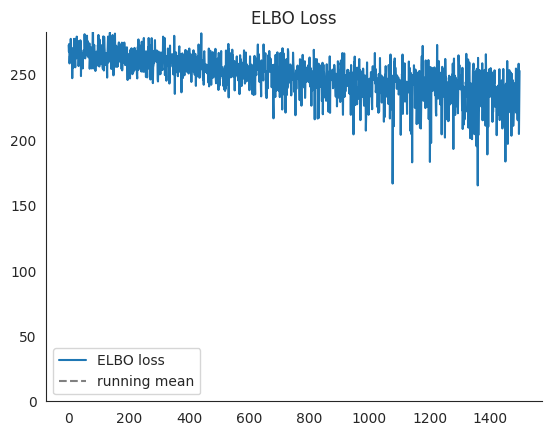

60 100
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 347.7513
[iteration 0050] loss: 348.2408
[iteration 0100] loss: 357.5120
[iteration 0150] loss: 343.2307
[iteration 0200] loss: 342.4598
[iteration 0250] loss: 338.4849
[iteration 0300] loss: 350.5930
[iteration 0350] loss: 350.7399
[iteration 0400] loss: 335.6456
[iteration 0450] loss: 352.4041
[iteration 0500] loss: 334.2873
[iteration 0550] loss: 332.0204
[iteration 0600] loss: 341.6803
[iteration 0650] loss: 341.5436
[iteration 0700] loss: 338.0176
[iteration 0750] loss: 341.9576
[iteration 0800] loss: 331.8153
[iteration 0850] loss: 353.6724
[iteration 0900] loss: 322.5550
[iteration 0950] loss: 329.4763
[iteration 1000] loss: 308.5908
[iteration 1050] loss: 332.2479
[iteration 1100] loss: 331.5846
[iteration 1150] loss: 288.6880
[iteration 1200] loss: 316.7176
[iteration 1250] loss: 316.4365
[iteration 1300] loss: 338.0832
[iteration 1350] loss: 344.5709
[iteration 1400] loss: 322

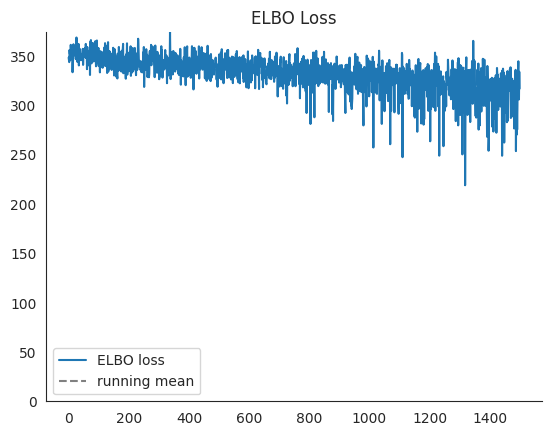

60 110
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 400.7439
[iteration 0050] loss: 409.1187
[iteration 0100] loss: 401.2095
[iteration 0150] loss: 418.8516
[iteration 0200] loss: 417.6489
[iteration 0250] loss: 398.4698
[iteration 0300] loss: 424.2200
[iteration 0350] loss: 403.3808
[iteration 0400] loss: 423.7870
[iteration 0450] loss: 396.6987
[iteration 0500] loss: 426.3456
[iteration 0550] loss: 379.2849
[iteration 0600] loss: 385.0622
[iteration 0650] loss: 411.2628
[iteration 0700] loss: 396.7075
[iteration 0750] loss: 411.6111
[iteration 0800] loss: 412.7733
[iteration 0850] loss: 391.8179
[iteration 0900] loss: 388.9723
[iteration 0950] loss: 417.4778
[iteration 1000] loss: 357.9247
[iteration 1050] loss: 412.8610
[iteration 1100] loss: 427.3840
[iteration 1150] loss: 429.9505
[iteration 1200] loss: 393.9810
[iteration 1250] loss: 409.9428
[iteration 1300] loss: 410.3448
[iteration 1350] loss: 376.4999
[iteration 1400] loss: 390

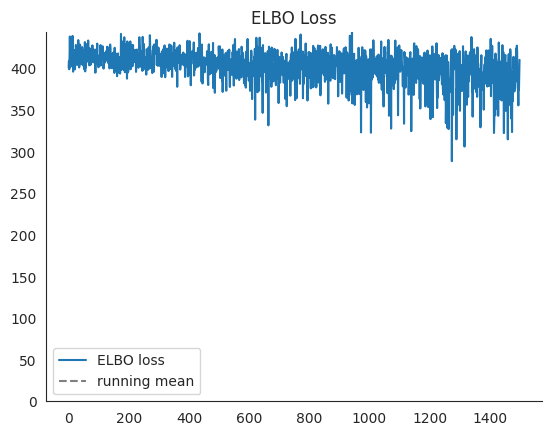

80 81
80 82
80 83
80 84
80 85
80 86
80 87
80 88
80 89
80 90
80 91
80 92
80 93
80 94
80 95
80 100
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 165.3914
[iteration 0050] loss: 170.2459
[iteration 0100] loss: 154.7218
[iteration 0150] loss: 163.8232
[iteration 0200] loss: 169.6668
[iteration 0250] loss: 162.2088
[iteration 0300] loss: 164.1570
[iteration 0350] loss: 144.3969
[iteration 0400] loss: 164.4655
[iteration 0450] loss: 157.3220
[iteration 0500] loss: 160.5958
[iteration 0550] loss: 146.1001
[iteration 0600] loss: 160.4225
[iteration 0650] loss: 154.8720
[iteration 0700] loss: 145.6115
[iteration 0750] loss: 162.4387
[iteration 0800] loss: 153.3168
[iteration 0850] loss: 165.5796
[iteration 0900] loss: 135.7493
[iteration 0950] loss: 159.8036
[iteration 1000] loss: 166.4294
[iteration 1050] loss: 154.6692
[iteration 1100] loss: 144.0030
[iteration 1150] loss: 144.3720
[iteration 1200] loss: 136.7397
[iteration 1250] loss: 165.3116


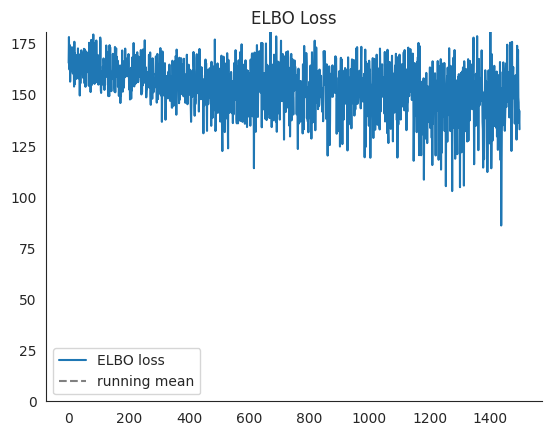

80 110
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 267.3608
[iteration 0050] loss: 273.0441
[iteration 0100] loss: 252.5728
[iteration 0150] loss: 253.9940
[iteration 0200] loss: 267.1275
[iteration 0250] loss: 250.3293
[iteration 0300] loss: 263.9289
[iteration 0350] loss: 254.9559
[iteration 0400] loss: 242.9994
[iteration 0450] loss: 242.6444
[iteration 0500] loss: 244.6350
[iteration 0550] loss: 259.9846
[iteration 0600] loss: 243.6604
[iteration 0650] loss: 252.7886
[iteration 0700] loss: 246.2263
[iteration 0750] loss: 252.8985
[iteration 0800] loss: 226.2467
[iteration 0850] loss: 255.1347
[iteration 0900] loss: 234.7864
[iteration 0950] loss: 247.6942
[iteration 1000] loss: 240.5233
[iteration 1050] loss: 257.4637
[iteration 1100] loss: 241.1546
[iteration 1150] loss: 197.1491
[iteration 1200] loss: 226.3621
[iteration 1250] loss: 230.4218
[iteration 1300] loss: 228.8526
[iteration 1350] loss: 239.8213
[iteration 1400] loss: 229

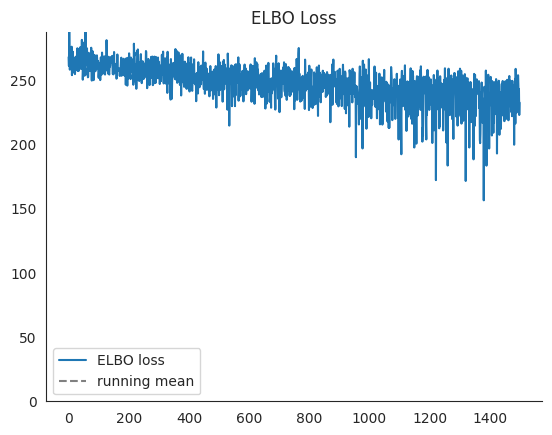

80 120
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 270.0347
[iteration 0050] loss: 247.8808
[iteration 0100] loss: 262.9968
[iteration 0150] loss: 273.3091
[iteration 0200] loss: 263.3120
[iteration 0250] loss: 264.6908
[iteration 0300] loss: 270.8786
[iteration 0350] loss: 261.8943
[iteration 0400] loss: 257.5712
[iteration 0450] loss: 267.6524
[iteration 0500] loss: 245.3751
[iteration 0550] loss: 256.0757
[iteration 0600] loss: 237.5390
[iteration 0650] loss: 251.8422
[iteration 0700] loss: 317.5908
[iteration 0750] loss: 262.9810
[iteration 0800] loss: 243.6794
[iteration 0850] loss: 238.0269
[iteration 0900] loss: 249.6658
[iteration 0950] loss: 216.6396
[iteration 1000] loss: 231.9038
[iteration 1050] loss: 325.4841
[iteration 1100] loss: 196.5794
[iteration 1150] loss: 292.4912
[iteration 1200] loss: 154.6340
[iteration 1250] loss: 240.9719
[iteration 1300] loss: 247.8387
[iteration 1350] loss: 186.1093
[iteration 1400] loss: 224

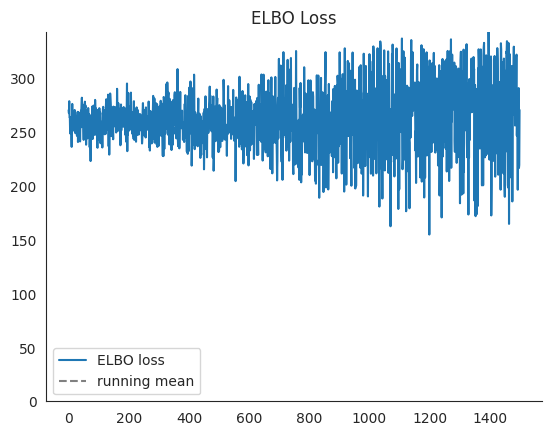

80 130
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 355.4295
[iteration 0050] loss: 333.6805
[iteration 0100] loss: 333.9736
[iteration 0150] loss: 351.4882
[iteration 0200] loss: 324.1727
[iteration 0250] loss: 368.6608
[iteration 0300] loss: 333.9965
[iteration 0350] loss: 337.6173
[iteration 0400] loss: 334.0843
[iteration 0450] loss: 343.8366
[iteration 0500] loss: 313.1578
[iteration 0550] loss: 372.1264
[iteration 0600] loss: 342.8832
[iteration 0650] loss: 327.7554
[iteration 0700] loss: 313.2179
[iteration 0750] loss: 341.9096
[iteration 0800] loss: 317.7875
[iteration 0850] loss: 345.0110
[iteration 0900] loss: 376.4678
[iteration 0950] loss: 356.0258
[iteration 1000] loss: 328.1868
[iteration 1050] loss: 272.5605
[iteration 1100] loss: 329.5558
[iteration 1150] loss: 373.5977
[iteration 1200] loss: 321.3309
[iteration 1250] loss: 390.5799
[iteration 1300] loss: 290.2083
[iteration 1350] loss: 380.7029
[iteration 1400] loss: 252

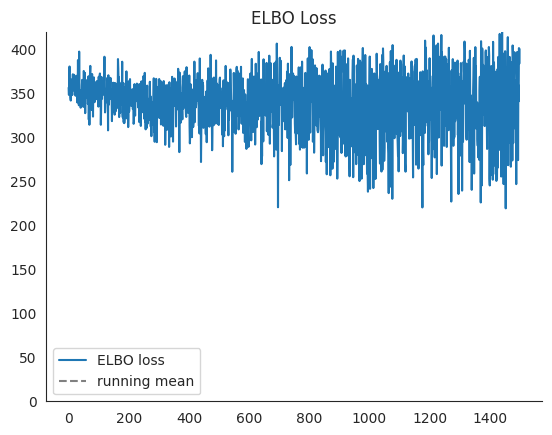

100 101
100 102
100 103
100 104
100 105
100 106
100 107
100 108
100 109
100 110
100 111
100 112
100 113
100 114
100 115
100 120
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 173.4530
[iteration 0050] loss: 179.3306
[iteration 0100] loss: 168.3292
[iteration 0150] loss: 167.9326
[iteration 0200] loss: 169.0402
[iteration 0250] loss: 177.2920
[iteration 0300] loss: 175.2386
[iteration 0350] loss: 176.5136
[iteration 0400] loss: 176.5822
[iteration 0450] loss: 172.2963
[iteration 0500] loss: 168.1336
[iteration 0550] loss: 154.4288
[iteration 0600] loss: 179.3350
[iteration 0650] loss: 168.1250
[iteration 0700] loss: 158.9988
[iteration 0750] loss: 152.1635
[iteration 0800] loss: 161.5179
[iteration 0850] loss: 165.3630
[iteration 0900] loss: 164.0196
[iteration 0950] loss: 160.9407
[iteration 1000] loss: 172.0067
[iteration 1050] loss: 151.8701
[iteration 1100] loss: 150.8596
[iteration 1150] loss: 160.2747
[iteration 1200] loss: 160.1339
[

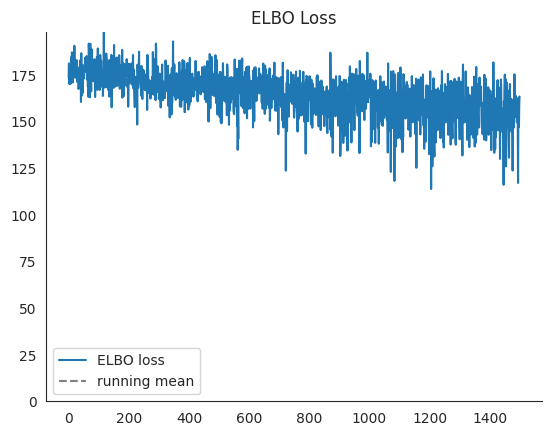

100 130
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 259.3272
[iteration 0050] loss: 262.7623
[iteration 0100] loss: 260.6120
[iteration 0150] loss: 250.4243
[iteration 0200] loss: 264.5074
[iteration 0250] loss: 259.1942
[iteration 0300] loss: 253.8903
[iteration 0350] loss: 252.1492
[iteration 0400] loss: 247.1104
[iteration 0450] loss: 254.6534
[iteration 0500] loss: 261.7187
[iteration 0550] loss: 247.5863
[iteration 0600] loss: 254.4445
[iteration 0650] loss: 245.4528
[iteration 0700] loss: 265.0333
[iteration 0750] loss: 245.7985
[iteration 0800] loss: 256.8733
[iteration 0850] loss: 252.6903
[iteration 0900] loss: 240.5286
[iteration 0950] loss: 237.1197
[iteration 1000] loss: 234.5943
[iteration 1050] loss: 237.8853
[iteration 1100] loss: 251.8681
[iteration 1150] loss: 254.8390
[iteration 1200] loss: 241.8987
[iteration 1250] loss: 232.0192
[iteration 1300] loss: 236.1189
[iteration 1350] loss: 193.4527
[iteration 1400] loss: 23

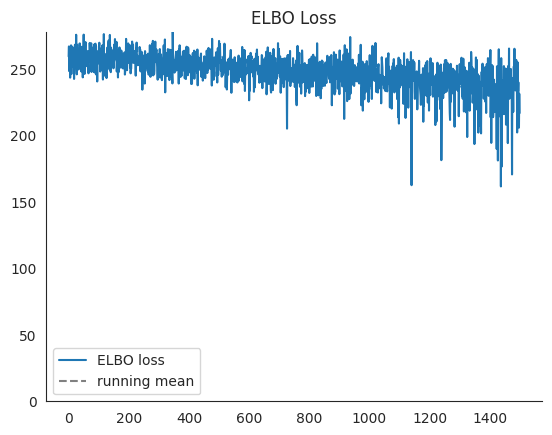

100 140
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 301.4303
[iteration 0050] loss: 304.8377
[iteration 0100] loss: 310.9986
[iteration 0150] loss: 320.7629
[iteration 0200] loss: 303.0490
[iteration 0250] loss: 305.8209
[iteration 0300] loss: 299.0621
[iteration 0350] loss: 279.0182
[iteration 0400] loss: 309.3350
[iteration 0450] loss: 290.3632
[iteration 0500] loss: 271.0513
[iteration 0550] loss: 270.8248
[iteration 0600] loss: 271.6767
[iteration 0650] loss: 259.3119
[iteration 0700] loss: 337.7902
[iteration 0750] loss: 291.9885
[iteration 0800] loss: 207.5899
[iteration 0850] loss: 296.2065
[iteration 0900] loss: 249.7531
[iteration 0950] loss: 224.7747
[iteration 1000] loss: 306.5906
[iteration 1050] loss: 309.5771
[iteration 1100] loss: 246.3529
[iteration 1150] loss: 230.1204
[iteration 1200] loss: 220.0734
[iteration 1250] loss: 311.2191
[iteration 1300] loss: 246.8351
[iteration 1350] loss: 295.4282
[iteration 1400] loss: 23

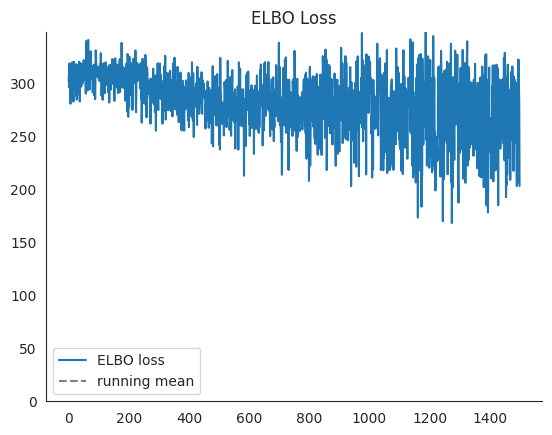

100 150
No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 432.7966
[iteration 0050] loss: 428.7062
[iteration 0100] loss: 436.7965
[iteration 0150] loss: 413.9500
[iteration 0200] loss: 417.2370
[iteration 0250] loss: 417.0645
[iteration 0300] loss: 443.1187
[iteration 0350] loss: 432.0741
[iteration 0400] loss: 419.4104
[iteration 0450] loss: 430.6179
[iteration 0500] loss: 431.6530
[iteration 0550] loss: 424.2814
[iteration 0600] loss: 430.1692
[iteration 0650] loss: 416.0234
[iteration 0700] loss: 412.5099
[iteration 0750] loss: 430.3669
[iteration 0800] loss: 402.9074
[iteration 0850] loss: 409.9668
[iteration 0900] loss: 403.3863
[iteration 0950] loss: 404.2160
[iteration 1000] loss: 399.9976
[iteration 1050] loss: 406.2293
[iteration 1100] loss: 386.8568
[iteration 1150] loss: 397.0116
[iteration 1200] loss: 418.1228
[iteration 1250] loss: 403.5781
[iteration 1300] loss: 400.3496
[iteration 1350] loss: 411.1376
[iteration 1400] loss: 40

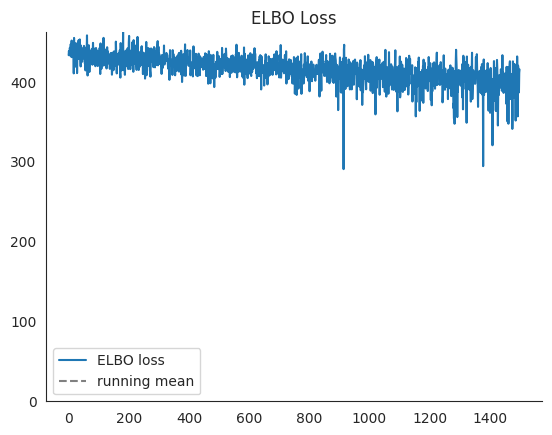

In [2]:
data_code = "15EQ20191202"

starts = []
ends = []
null_mses = []
model_mses = []
rsquareds = []




for start in [0, 20, 40, 60, 80, 100 ]:
    for end in [start + end for end in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50]]:
        starts.append(start)
        ends.append(end)
        print(start, end)

        locds = lc.LocustDS(data_code = data_code, 
                    start = start,
                    end = end,)
        locds.run_inference("length", 
                        num_iterations= 1500,num_samples = 100)
        
        locds.evaluate()

        null_mses.append(locds.null_mse.numpy())   
        model_mses.append(locds.mse_mean)
        rsquareds.append(locds.rsquared)
        



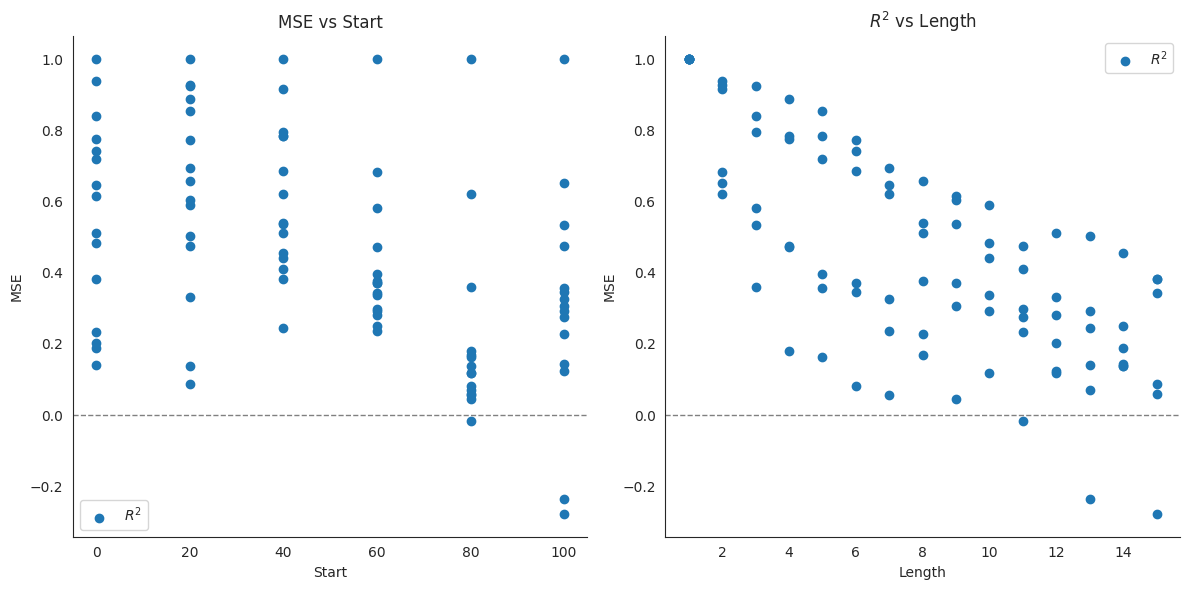

In [22]:
results = pd.DataFrame(
    {"start": starts,
    "end":  ends,
    "null_mse":  null_mses,
    "model_mse": model_mses,
    "rsquared": rsquareds}
)

results['length'] = results['end'] - results['start']

import matplotlib.pyplot as plt

# Plot against 'start'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.scatter(results['start'], results['rsquared'], label='$R^2$', marker='o')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Start')
plt.ylabel('MSE')
plt.title('MSE vs Start')
sns.despine()
plt.legend()


plt.subplot(1, 2, 2)  
plt.scatter(results['length'], results['rsquared'], label='$R^2$', marker='o')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Length')
plt.ylabel('MSE')
plt.title('$R^2$ vs Length')
sns.despine()
plt.legend()

plt.tight_layout()  
plt.show()

root = find_repo_root()
results_path =  os.path.join(
            root, f"data/foraging/locust/ds/length_experiment_results_{data_code}.pkl"
        )
with open(results_path, "wb") as f:
    dill.dump(results, f)
